## Perceptron - different alfas

In [19]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [20]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar_no_teta, repetitions)
d_all = reproduce_x_times(d_unipolar, repetitions)
x_all = x_all + get_random(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[-0.0146228 ,  0.0405495 ,  0.96956382,  0.97753877, -0.024335  ],
        [-0.00557313,  0.96778018, -0.01130898,  1.03289227, -0.0402553 ]]),
 array([[0, 0, 0, 1, 0]]))

In [21]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((2, 600), (2, 200), (1, 600), (1, 200))

In [22]:
x_range = np.arange(-2, 4)
experiments_numb = 10

In [28]:
perceptrons = []
tetas = list(np.linspace(0, 1, num=1000))[1:]
for teta in tetas:
    estimate_func = lambda v: unipolar(teta, v)
    p = Perceptron(x_train, d_train, x_test, d_test, estimate_func, 1.0, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

999

,θ,average epoch count
0,0.001001,100.0
1,0.002002,100.0
2,0.003003,100.0
3,0.004004,100.0
4,0.005005,100.0
...,...,...
994,0.995996,100.0
995,0.996997,100.0
996,0.997998,100.0
997,0.998999,100.0


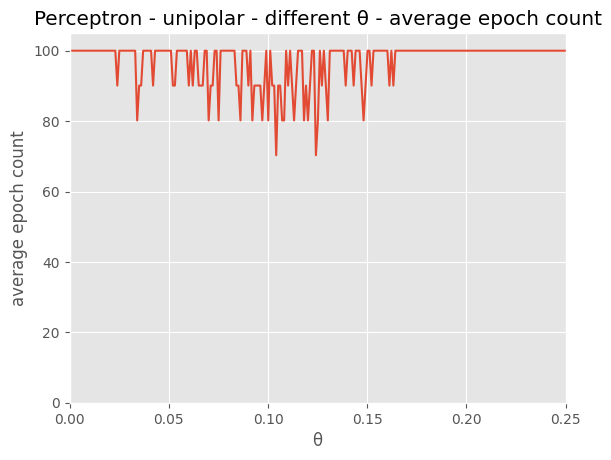

In [36]:
x, y = tetas, [v.average_epoch_count for v in perceptrons]
plt.plot(x, y)
plt.title("Perceptron - unipolar - different θ - average epoch count")
plt.xlabel("θ")
plt.ylabel("average epoch count")
plt.ylim(0, 105)
plt.xlim(0, 0.25)
pd.DataFrame({"θ":x, "average epoch count":y})

,θ,average matching percent
0,0.001001,49.90
1,0.002002,47.25
2,0.003003,52.55
3,0.004004,52.50
4,0.005005,47.55
...,...,...
994,0.995996,69.50
995,0.996997,69.50
996,0.997998,69.50
997,0.998999,69.50


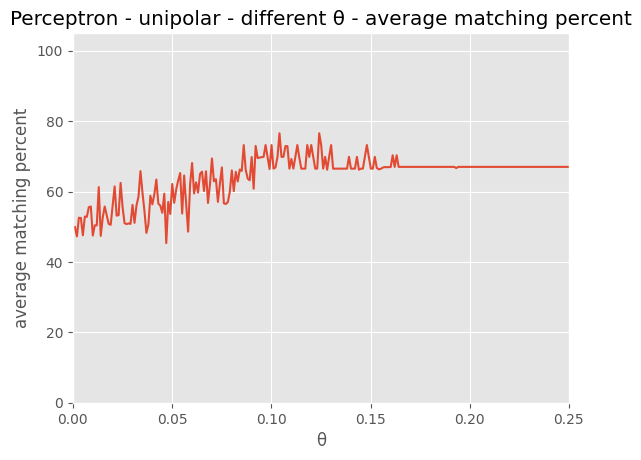

In [37]:
len(perceptrons)
x, y = tetas, [v.average_matching_percent for v in perceptrons]
plt.plot(x, y)
plt.title("Perceptron - unipolar - different θ - average matching percent")
plt.xlabel("θ")
plt.ylabel("average matching percent")
plt.ylim(0, 105)
plt.xlim(0, 0.25)
pd.DataFrame({"θ": x, "average matching percent": y})

In [50]:
from time import sleep
len(perceptrons)
for p in perceptrons:
    if p.average_epoch_count != 100:
        print(p.matching_percents)
        print(p.epoch_nums)
        print("#"*100)
        sleep(1)
        # break

[36.5, 64.5, 64.5, 64.5, 36.5, 64.5, 64.5, 64.5, 64.5, 100.0]
[100, 100, 100, 100, 100, 100, 100, 100, 100, 1]
####################################################################################################
[65.0, 63.0, 65.0, 100.0, 65.0, 37.0, 100.0, 63.5, 36.5, 63.0]
[100, 100, 100, 1, 100, 100, 1, 100, 100, 100]
####################################################################################################
[36.5, 37.0, 65.0, 63.5, 65.0, 65.0, 63.5, 100.0, 65.0, 37.0]
[100, 100, 100, 100, 100, 100, 100, 1, 100, 100]
####################################################################################################
[65.0, 63.0, 38.0, 65.0, 100.0, 37.0, 65.0, 37.0, 37.0, 38.0]
[100, 100, 100, 100, 1, 100, 100, 100, 100, 100]
####################################################################################################
[65.5, 65.5, 65.5, 65.5, 38.0, 37.5, 65.5, 65.5, 65.5, 100.0]
[100, 100, 100, 100, 100, 100, 100, 100, 100, 1]
##########################################